In [3]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData, Table

In [4]:
import datetime as dt 
import pandas as pd 

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [7]:
Base.classes.keys()

['measurement', 'station']

In [8]:
inspector = inspect(engine)
records = inspector.get_columns('measurement')
for record in records:
    print(record['name'], record['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
session.query(func.count(Measurement.date)).all()

[(19550)]

In [10]:
# set date string in the format '%m' for June
date_str = "06"

## D1: Determine the Summary Statistics for June

In [11]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

# Set date string variable in the format "%m" for the month of June
june = "06"
results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date) == june).all()

In [12]:
#  3. Convert the June temperatures to a list.
results = []
results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date) == june).all()
results

 78.0),
 ('2014-06-16', 78.0),
 ('2014-06-17', 77.0),
 ('2014-06-18', 78.0),
 ('2014-06-19', 78.0),
 ('2014-06-20', 73.0),
 ('2014-06-21', 75.0),
 ('2014-06-22', 75.0),
 ('2014-06-23', 76.0),
 ('2014-06-24', 84.0),
 ('2014-06-25', 79.0),
 ('2014-06-26', 76.0),
 ('2014-06-27', 79.0),
 ('2014-06-28', 79.0),
 ('2014-06-29', 77.0),
 ('2014-06-30', 79.0),
 ('2015-06-01', 78.0),
 ('2015-06-02', 78.0),
 ('2015-06-03', 79.0),
 ('2015-06-04', 77.0),
 ('2015-06-05', 79.0),
 ('2015-06-06', 78.0),
 ('2015-06-07', 78.0),
 ('2015-06-08', 78.0),
 ('2015-06-09', 79.0),
 ('2015-06-10', 77.0),
 ('2015-06-11', 78.0),
 ('2015-06-12', 78.0),
 ('2015-06-13', 78.0),
 ('2015-06-14', 78.0),
 ('2015-06-15', 79.0),
 ('2015-06-16', 79.0),
 ('2015-06-17', 77.0),
 ('2015-06-18', 78.0),
 ('2015-06-19', 78.0),
 ('2015-06-20', 78.0),
 ('2015-06-21', 79.0),
 ('2015-06-22', 79.0),
 ('2015-06-23', 77.0),
 ('2015-06-24', 79.0),
 ('2015-06-25', 79.0),
 ('2015-06-26', 79.0),
 ('2015-06-27', 81.0),
 ('2015-06-28', 76.0),
 ('

In [13]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns = ['date','temperature'])
df

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [14]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [15]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec = "12"
results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date) == dec).all()

In [27]:
# 7. Convert the December temperatures to a list.
results = []
results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date) == dec).all()
results

 73.0),
 ('2014-12-15', 72.0),
 ('2014-12-16', 74.0),
 ('2014-12-17', 72.0),
 ('2014-12-18', 74.0),
 ('2014-12-19', 75.0),
 ('2014-12-20', 74.0),
 ('2014-12-21', 70.0),
 ('2014-12-22', 74.0),
 ('2014-12-23', 70.0),
 ('2014-12-24', 66.0),
 ('2014-12-25', 61.0),
 ('2014-12-26', 63.0),
 ('2014-12-27', 63.0),
 ('2014-12-28', 63.0),
 ('2014-12-29', 63.0),
 ('2014-12-30', 67.0),
 ('2014-12-31', 56.0),
 ('2015-12-01', 75.0),
 ('2015-12-02', 77.0),
 ('2015-12-03', 75.0),
 ('2015-12-04', 75.0),
 ('2015-12-05', 75.0),
 ('2015-12-06', 75.0),
 ('2015-12-07', 71.0),
 ('2015-12-08', 70.0),
 ('2015-12-09', 74.0),
 ('2015-12-10', 74.0),
 ('2015-12-11', 75.0),
 ('2015-12-12', 72.0),
 ('2015-12-13', 70.0),
 ('2015-12-14', 66.0),
 ('2015-12-15', 74.0),
 ('2015-12-16', 75.0),
 ('2015-12-17', 74.0),
 ('2015-12-18', 75.0),
 ('2015-12-19', 76.0),
 ('2015-12-20', 74.0),
 ('2015-12-21', 75.0),
 ('2015-12-22', 74.0),
 ('2015-12-23', 73.0),
 ('2015-12-24', 68.0),
 ('2015-12-25', 73.0),
 ('2015-12-26', 74.0),
 ('

In [28]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_12 = pd.DataFrame(results, columns = ['date','temperature'])
df_12 

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [29]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_12.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

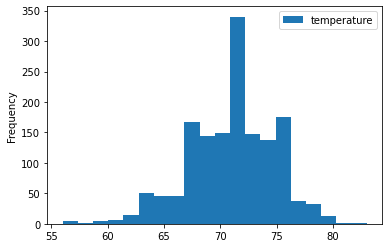

In [30]:
# Plot December data
df_12.plot.hist(bins=20)

In [33]:
# Run query for June data again to plot the data
june = "06"
results_june = []
results_june = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date) == june).all()
df_06 = pd.DataFrame(results_june, columns = ['date','temperature'])
df_06.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:ylabel='Frequency'>

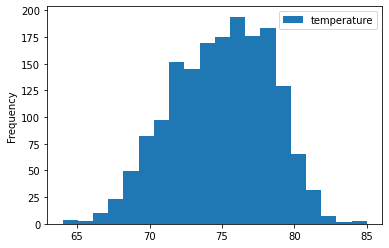

In [34]:
# Plot June data
df_06.plot.hist(bins=20)

In [36]:
# Summary Part additional query
# filter December data with temperature below 64
results_cold = []
results_cold = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m",Measurement.date) == dec).\
    filter(Measurement.tobs <= 64.9).all()
results_cold

[('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2011-12-31', 63.0),
 ('2012-12-23', 64.0),
 ('2012-12-29', 64.0),
 ('2014-12-25', 61.0),
 ('2014-12-26', 63.0),
 ('2014-12-27', 63.0),
 ('2014-12-28', 63.0),
 ('2014-12-29', 63.0),
 ('2014-12-31', 56.0),
 ('2016-12-16', 62.0),
 ('2010-12-07', 64.0),
 ('2014-12-31', 64.0),
 ('2016-12-16', 63.0),
 ('2010-12-06', 64.0),
 ('2010-12-08', 62.0),
 ('2010-12-10', 64.0),
 ('2010-12-11', 64.0),
 ('2014-12-29', 64.0),
 ('2010-12-10', 63.0),
 ('2010-12-06', 61.0),
 ('2013-12-05', 64.0),
 ('2014-12-26', 63.0),
 ('2014-12-27', 62.0),
 ('2014-12-30', 63.0),
 ('2014-12-31', 56.0),
 ('2016-12-16', 63.0),
 ('2010-12-06', 61.0),
 ('2010-12-07', 58.0),
 ('2010-12-08', 60.0),
 ('2010-12-17', 64.0),
 ('2012-12-24', 62.0),
 ('2012-12-28', 62.0),
 ('2013-12-05', 64.0),
 ('2013-12-16', 63.0),
 ('2013-12-17', 64.0),
 ('2014-12-07', 62.0),
 ('2014-12-08', 62.0),
 ('2014-12-10', 61.0),
 ('2014-12-25', 60.0),
 ('2014-12-26', 63.0),
 ('2014-12-28', 64.0),
 ('2014-12-

In [41]:
# count the number of below 65 temperature data in the list
len(results_cold)

80

In [44]:
# Calculate the frequency
len(results_cold)/1517

0.05273566249176005